In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sb
import scipy.stats as st
%matplotlib inline 

import data

In [12]:
data = pd.read_csv("Desktop/DataMining (IN3011)/Project/HR_data.csv")

In [13]:
data.head(n=5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [47]:
data.rename(columns={'time_spend_company':'time_spent_at_company'}, inplace = True)
data.rename(columns={'Work_accident':'work_accident'}, inplace = True)
data.rename(columns={'sales':'department'}, inplace = True)
data.rename(columns={'number_project':'projects'}, inplace = True)
data.rename(columns={'last_evaluation':'evaluation'}, inplace = True)
data.rename(columns={'promotion_last_5years':'promotion'}, inplace = True)
data.rename(columns={'satisfaction_level':'satisfaction'}, inplace = True)

In [4]:
# convert string variables to numerical
# first check their values
data['sales'].unique(),data['salary'].unique()

(array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
        'IT', 'product_mng', 'marketing', 'RandD'], dtype=object),
 array(['low', 'medium', 'high'], dtype=object))

In [5]:
#Convert 'sales' and 'salary' to numeric
data['sales'].replace(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
        'IT', 'product_mng', 'marketing', 'RandD'], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], inplace = True)
data['salary'].replace(['low', 'medium', 'high'], [0, 1, 2], inplace = True)

In [32]:
#The new feature indicate how many hours the employee spend on a single project
#You can also treat this as 'work efficiency'
data['avg_hour_project'] = (data['average_montly_hours'] * 12) /data['number_project']
data['avg_hour_project_range'] = pd.cut(data['avg_hour_project'], 3)
data[['avg_hour_project_range', 'left']].groupby(['avg_hour_project_range']).mean()

,left
avg_hour_project_range,
"(192.334, 749.333]",0.191503
"(749.333, 1304.667]",0.348383
"(1304.667, 1860.0]",0.101083


In [9]:
#uhmm
data.loc[data['avg_hour_project'] <= 749.333, 'avg_hour_project'] = 0
data.loc[(data['avg_hour_project'] > 749.333) & (data['avg_hour_project'] <= 1304.667), 'avg_hour_project'] = 1
data.loc[(data['avg_hour_project'] > 1304.667) & (data['avg_hour_project'] <= 1860.00), 'avg_hour_project'] = 2
data.drop(['avg_hour_project_range'], axis = 1, inplace = True)

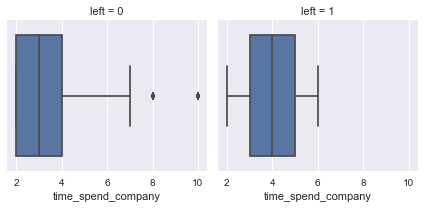

In [10]:
#time_spend_company
#Boxplot
#To briefly see the data distribution and if there're outliers
g = sb.FacetGrid(data, col = 'left')
g.map(sb.boxplot, 'time_spend_company')

- this shows that there are outliers

In [11]:
#Outliers do exist, simply drop those observations
dropdata = data[data['time_spend_company'] >= 8]
data.drop(dropdata.index, inplace = True)

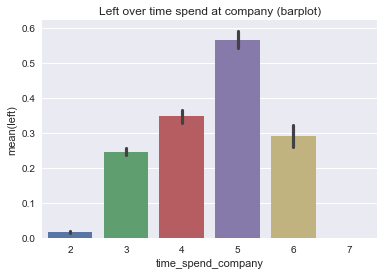

In [12]:
sb.barplot(x = 'time_spend_company', y = 'left', data = data)
sb.plt.title('Left over time spend at company (barplot)')

- workers are more likely to leave if they've been at the company from 3 to 5 years

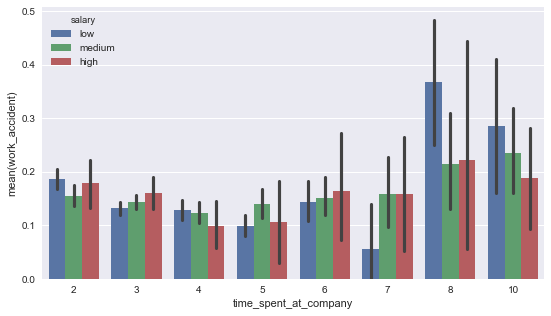

In [44]:
#time spend with work accident ---> THis is some MULTIVARIET SHIT
sb.barplot(x='time_spent_at_company', y = 'work_accident', hue = 'salary', data = data)

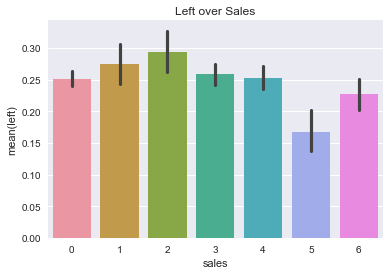

In [14]:
#Sales
sb.barplot('sales','left',order=[0, 1, 2, 3, 4, 5, 6], data=data)
sb.plt.title('Left over Sales')

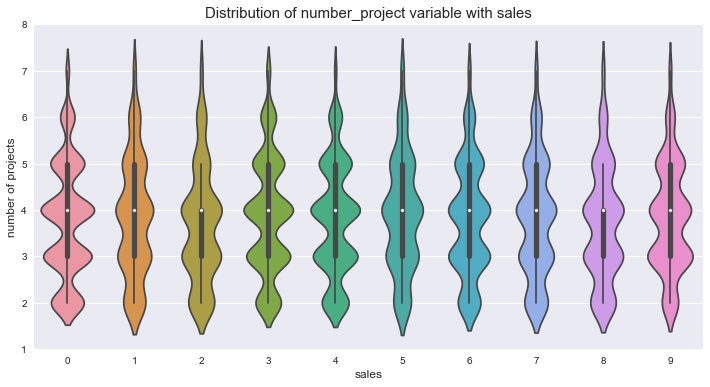

In [15]:
var_name = "sales"
col_order = np.sort(data[var_name].unique()).tolist()
plt.figure(figsize=(12,6))
sb.violinplot(x=var_name, y='number_project', data=data, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('number of projects', fontsize=12)
plt.title("Distribution of number_project variable with "+var_name, fontsize=15)
plt.show()

Normality stuff

In [ ]:
st.kstest(data.avg_monthly_hours, 'norm')

st.jarque_bera(data.last_evaluation)

print (st.kstest(low_half_eval.avg_monthly_hours, 'norm'))
print (st.kstest(high_half_eval.avg_monthly_hours, 'norm'))

st.jarque_bera(data.avg_monthly_hours)

In [37]:
sample1 = st.norm.rvs(size = 24907)s

In [38]:
st.kstest(sample1, st.norm.cdf)

KstestResult(statistic=0.004250031350707062, pvalue=0.75923064737924484)

ML rough ---- 

In [57]:
data.head(n=5)

,satisfaction,evaluation,projects,average_montly_hours,time_spent_at_company,work_accident,left,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [60]:
X = data.drop(['left'],axis = 1)
Y = data.left

In [61]:
X.head()

,satisfaction,evaluation,projects,average_montly_hours,time_spent_at_company,work_accident,promotion,department,salary
0,0.38,0.53,2,157,3,0,0,sales,low
1,0.80,0.86,5,262,6,0,0,sales,medium
2,0.11,0.88,7,272,4,0,0,sales,medium
3,0.72,0.87,5,223,5,0,0,sales,low
4,0.37,0.52,2,159,3,0,0,sales,low


In [62]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [65]:
department = pd.get_dummies(X["department"])
salary = pd.get_dummies(X["salary"])

In [66]:
X = X.drop(['department', 'salary'], axis = 1)
X.head()

,satisfaction,evaluation,projects,average_montly_hours,time_spent_at_company,work_accident,promotion
0,0.38,0.53,2,157,3,0,0
1,0.80,0.86,5,262,6,0,0
2,0.11,0.88,7,272,4,0,0
3,0.72,0.87,5,223,5,0,0
4,0.37,0.52,2,159,3,0,0


In [67]:
X = pd.concat([X, department, salary], axis = 1)
X.head()

,satisfaction,evaluation,projects,average_montly_hours,time_spent_at_company,work_accident,promotion,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical,high,low,medium
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [68]:
X.shape

(14999, 20)

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state = 147)

In [72]:
X_train.head()

,satisfaction,evaluation,projects,average_montly_hours,time_spent_at_company,work_accident,promotion,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical,high,low,medium
11279,0.22,0.91,6,222,8,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1794,0.38,0.51,2,159,3,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
14879,0.41,0.49,2,147,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
5741,0.59,0.39,4,190,5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
5303,0.71,0.98,5,167,3,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [73]:
Y_train.head()

11279    0
1794     1
14879    1
5741     0
5303     0
Name: left, dtype: int64

In [74]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.neighbors import KNeighborsClassifier as KNC

In [75]:
model = LR()

In [76]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [77]:
preds = model.predict(X_test)

In [78]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, preds)

0.79333333333333333

Benchmark: LR: 0.7933

In [79]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, preds)

array([[2141,  150],
       [ 470,  239]])

Thus in binary classification, 
    the count of true negatives is :math:`C_{0,0}`, false negatives is :math:`C_{1,0}`, 
    true positives is :math:`C_{1,1}` and false positives is :math: `C_{0,1}`.

In [80]:
from sklearn.metrics import recall_score
recall_score(y_test, preds)

0.33709449929478136

This is not very good, in fact worse than random. Why? The algorithm is biased towards the majority - people that stayed. The dataset is not balanced (more stayers than leavers).

In [81]:
DT()

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [82]:
model = DT()
model.fit(X_train, y_train)
preds = model.predict(X_test)

In [83]:
accuracy_score(y_test, preds)

0.98133333333333328

In [84]:
confusion_matrix(y_test, preds)

array([[2258,   33],
       [  23,  686]])

In [88]:
from sklearn.tree import export_graphviz

In [ ]:
#dot_data = export_graphviz(model, out_file=None, 
                        #feature_names=X_train.columns,  
                        #class_names=None,  
                        #filled=True, rounded=True,  
                        #special_characters=True)

In [89]:
with open("out_tree.dot", "w") as f:
    f = export_graphviz(model, out_file=f)

In [7]:
data_drop=data.drop(labels=['department','salary'],axis=1)
data_drop.head()

,satisfaction,evaluation,projects,average_montly_hours,time_spent_at_company,work_accident,left,promotion
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0


In [8]:
cols = data_drop.columns.tolist()
cols.insert(0, cols.pop(cols.index('left')))
cols

['left',
 'satisfaction',
 'evaluation',
 'projects',
 'average_montly_hours',
 'time_spent_at_company',
 'work_accident',
 'promotion']

In [9]:
data_drop = data_drop.reindex(columns= cols)

In [10]:
X = data_drop.iloc[:,1:8].values
y = data_drop.iloc[:,0].values
X

array([[ 0.38,  0.53,  2.  , ...,  3.  ,  0.  ,  0.  ],
       [ 0.8 ,  0.86,  5.  , ...,  6.  ,  0.  ,  0.  ],
       [ 0.11,  0.88,  7.  , ...,  4.  ,  0.  ,  0.  ],
       ..., 
       [ 0.37,  0.53,  2.  , ...,  3.  ,  0.  ,  0.  ],
       [ 0.11,  0.96,  6.  , ...,  4.  ,  0.  ,  0.  ],
       [ 0.37,  0.52,  2.  , ...,  3.  ,  0.  ,  0.  ]])

In [11]:
np.shape(X)

(14999, 7)

In [13]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [16]:
from sklearn.decomposition import PCA 
sklearn_pca = PCA(n_components=6)
Y_sklearn = sklearn_pca.fit_transform(X_std)
Y_sklearn.shape

(14999, 6)

In [ ]:
Y_sklearn.head()

In [14]:
data.rename(columns={'time_spend_company':'time_spent_at_company'}, inplace = True)
data.rename(columns={'Work_accident':'work_accident'}, inplace = True)
data.rename(columns={'sales':'department'}, inplace = True)
data.rename(columns={'number_project':'projects'}, inplace = True)
data.rename(columns={'promotion_last_5years':'promotion'}, inplace = True)

In [15]:
data.head()

,satisfaction_level,last_evaluation,projects,average_montly_hours,time_spent_at_company,work_accident,left,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [16]:
from sklearn.model_selection import train_test_split
# Create train and test splits
# Convert these variables into categorical variables
data["department"] = data["department"].astype('category').cat.codes
data["salary"] = data["salary"].astype('category').cat.codes


# Move the reponse variable "turnover" to the front of the table
front = data['left']
data.drop(labels=['left'], axis=1,inplace = True)
data.insert(0, 'left', front)

# Create an intercept term for the logistic regression equation
data['int'] = 1
indep_var = ['satisfaction_level', 'projects', 'time_spent_at_company', 'int', 'left']
data = data[indep_var]

# Create train and test splits
target_name = 'left'
X = data.drop('left', axis=1)

y=data[target_name]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=123, stratify=y)

X_train.head()

,satisfaction_level,projects,time_spent_at_company,int
6197,0.15,5,4,1
1955,0.09,6,4,1
9440,0.57,2,2,1
9365,0.85,2,2,1
7725,0.16,4,6,1


In [18]:
import statsmodels.api as sm
iv = ['satisfaction_level','projects','time_spent_at_company', 'int']
logReg = sm.Logit(y_test, X_test[iv])
answer = logReg.fit()

answer.summary
answer.params

Optimization terminated successfully.
         Current function value: 0.469234
         Iterations 6


satisfaction_level      -3.758404
projects                -0.097457
time_spent_at_company    0.181405
int                      0.647410
dtype: float64

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
model = LogisticRegression()
model = model.fit(X_train,y_train)
print ("Test set accuracy score: " + str(model.score(X_test,y_test)))
print ("Train set accuracy score: " + str(model.score(X_train,y_train)))

Test set accuracy score: 0.761333333333
Train set accuracy score: 0.764397033086


In [58]:
from sklearn.metrics import confusion_matrix
preds = model.predict(X_test)
confusion_matrix(y_test, preds)

array([[2099,  187],
       [ 529,  185]])

In [23]:
coef = answer.params
def y (coef, satisfaction_level, projects, time_spent_at_company) : 
    return coef[3] + coef[0]*satisfaction_level + coef[1]*projects + coef[2]*time_spent_at_company
y1 = y(coef, 0.9, 7, 8)
p = np.exp(y1) / (1+np.exp(y1))
p

0.12280774352792249

In [42]:
from sklearn.metrics import roc_auc_score
rfc_score_train = rfc.score(X_train, y_train)
rf_roc_auc = roc_auc_score(y_test, rfc.predict(X_test))

In [31]:
#random forest
from sklearn.ensemble import RandomForestClassifier

In [33]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [26]:
logis = LogisticRegression(class_weight = "balanced")
logis.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

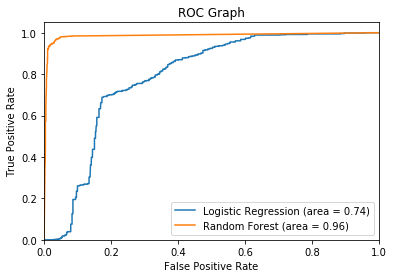

In [46]:
# Create ROC Graph
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, logis.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rfc.predict_proba(X_test)[:,1])

plt.figure()

# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)

# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

In [44]:
logit_roc_auc = roc_auc_score(y_test, logis.predict(X_test))